In [16]:
import pandas as pd

def read_library(file_path):  
    df = pd.read_excel(file_path)
    index_list = df.iloc[:, 0]
    library = df.iloc[:, 1]
    return index_list, library

# 读取文库列表，从索引1开始
index_list, library = read_library('/home/liuycomputing/lby_FASTQ_data_202408/refLib-SEQ2210.xlsx')
lib_len = len(library[0])

In [17]:
import pickle

def load_dict_pickle(file_path):
    with open(file_path, 'rb') as f:
        return pickle.load(f)

file_folder = '/home/liuycomputing/lby_FASTQ_data_202408/process_20250326/'
folder_name = 'YZX-148_9'

mapped_error_dict_file_name = '/mapped_error_dict.pkl'
mapped_error_dict = load_dict_pickle(file_path=file_folder+folder_name+mapped_error_dict_file_name)

complete_error_file_name = '/complete_error_dict.pkl'
complete_error_dict = load_dict_pickle(file_path=file_folder+folder_name+complete_error_file_name)

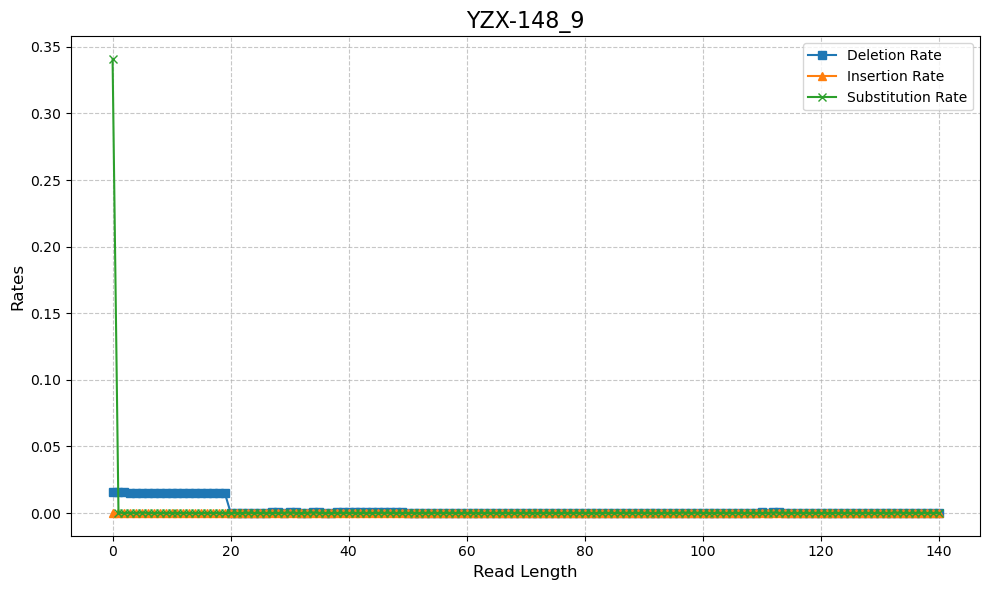

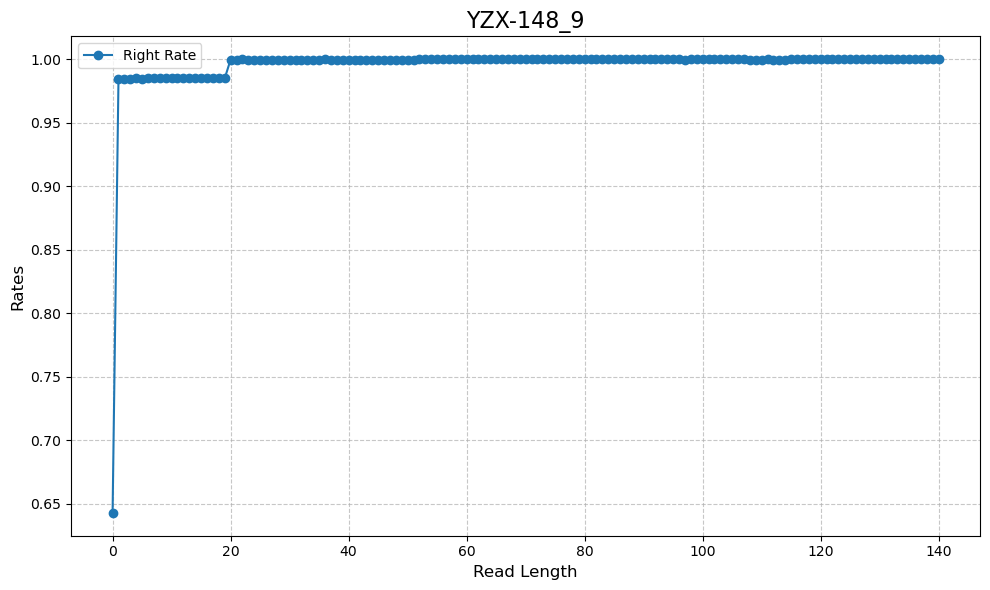

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# 定义函数来计算完整的错误率
def compute_complete_error_rate(complete_set_dict):
    right_list = np.array(complete_set_dict['Right'], dtype=float)
    deletion_list = np.array(complete_set_dict['Deletion'], dtype=float)
    insertion_list = np.array(complete_set_dict['Insertion'], dtype=float)
    substitution_list = np.array(complete_set_dict['Substitution'], dtype=float)
    total_num = right_list + deletion_list + insertion_list + substitution_list
    # total_num = 10800
    # deletion_list = total_num - (insertion_list + substitution_list + right_list) 

    complete_set_dict['Right-Rate'] = (right_list / total_num).tolist()
    complete_set_dict['Deletion-Rate'] = (deletion_list / total_num).tolist()
    complete_set_dict['Insertion-Rate'] = (insertion_list / total_num).tolist()
    complete_set_dict['Substitution-Rate'] = (substitution_list / total_num).tolist()

    return complete_set_dict

# 改成绘制在一张图上的函数
def plot_complete_error_rates(complete_rate_dict, figure_name):
    x = range(len(complete_rate_dict['Right-Rate']))  # 假设每个数据点有序
    plt.figure(figsize=(10, 6))  # 设置图形大小

    # 绘制每种错误率
    plt.plot(x, complete_rate_dict['Deletion-Rate'], label='Deletion Rate', marker='s')
    plt.plot(x, complete_rate_dict['Insertion-Rate'], label='Insertion Rate', marker='^')
    plt.plot(x, complete_rate_dict['Substitution-Rate'], label='Substitution Rate', marker='x')

    # 添加标题和标签
    plt.title(figure_name, fontsize=16)
    plt.xlabel('Read Length', fontsize=12)
    plt.ylabel('Rates', fontsize=12)

    # 添加图例
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    # 显示图形
    plt.show()

def plot_complete_right_rate(complete_rate_dict, figure_name):
    x = range(len(complete_rate_dict['Right-Rate']))  # 假设每个数据点有序
    plt.figure(figsize=(10, 6))  # 设置图形大小

    # 绘制每种错误率
    plt.plot(x, complete_rate_dict['Right-Rate'], label='Right Rate', marker='o')

    # 添加标题和标签
    plt.title(figure_name, fontsize=16)
    plt.xlabel('Read Length', fontsize=12)
    plt.ylabel('Rates', fontsize=12)

    # 添加图例
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    # 显示图形
    plt.show()

# 计算错误率
complete_rate_dict = compute_complete_error_rate(complete_error_dict)

# 绘制所有错误率在一张图上
plot_complete_error_rates(complete_rate_dict, figure_name=folder_name)
plot_complete_right_rate(complete_rate_dict, figure_name=folder_name)

In [19]:
import csv

def write_file(file_name, error_dict, number):
    with open(file_name, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)

        # 写入表头
        header = ['Key', 'Error Type'] + [f'Position {i+1}' for i in range(number)]
        writer.writerow(header)

        # 写入数据
        for key, error_types in error_dict.items():
            if key == 'LowQuality':
                continue
            for error_type, values in error_types.items():
                row = [key, error_type] + values
                writer.writerow(row)
    
    print(file_name, ' done')

lib_len = len(library[0])
write_file(
    file_name= file_folder + folder_name + '/per_item_read1.csv', 
    error_dict=mapped_error_dict, 
    number=lib_len
)

/home/liuycomputing/lby_FASTQ_data_202408/process_20250326/YZX-148_9/per_item_read1.csv  done


In [20]:
import csv

def write_file(file_name, error_dict, number):
    with open(file_name, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)

        # 写入表头
        header = ['Error Type'] + [f'Position {i+1}' for i in range(number)]
        writer.writerow(header)

        # 写入数据
        for key, values in error_dict.items():
            row = [key] + values
            writer.writerow(row)
    
    print(file_name, ' done')

lib_len = len(library[0])
write_file(
    file_name= file_folder + folder_name + '/complete_rate_read1.csv', 
    error_dict=complete_rate_dict, 
    number=lib_len
)

/home/liuycomputing/lby_FASTQ_data_202408/process_20250326/YZX-148_9/complete_rate_read1.csv  done
